In [49]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pmdarima.arima import auto_arima
from datetime import datetime
import matplotlib.pyplot as plt
import tsfresh
from pmdarima.arima import ADFTest
from tsfresh import extract_features

In [50]:
values = read_csv("../../Time_series_data.csv")

In [51]:
len(values.index)

35064

In [52]:
values = values.rename(columns={values.columns[1]: 'Data'})

In [35]:
values['Month'] = pd.to_datetime(values['Month'], errors = 'coerce')
# values.set_index('Month', inplace=True)

In [36]:
values

,Month,Data
0,2013-01-01,2815
1,2013-02-01,2672
2,2013-03-01,2755
3,2013-04-01,2721
4,2013-05-01,2946
...,...,...
100,2021-05-01,4618
101,2021-06-01,5312
102,2021-07-01,4298
103,2021-08-01,1413


In [37]:
missing_values_count = values.isna().sum().sum()
print(missing_values_count)

0


In [38]:
values['ID'] = 'Duy'

In [39]:
# Trích xuất các đặc trưng của chuỗi thời gian
# default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())

In [40]:
features = extract_features(values,column_id='ID',column_sort='Month',n_jobs=8)

Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 1/1 [00:07<00:00,  7.55s/it]


In [41]:
list(features.columns)

['Data__variance_larger_than_standard_deviation',
 'Data__has_duplicate_max',
 'Data__has_duplicate_min',
 'Data__has_duplicate',
 'Data__sum_values',
 'Data__abs_energy',
 'Data__mean_abs_change',
 'Data__mean_change',
 'Data__mean_second_derivative_central',
 'Data__median',
 'Data__mean',
 'Data__length',
 'Data__standard_deviation',
 'Data__variation_coefficient',
 'Data__variance',
 'Data__skewness',
 'Data__kurtosis',
 'Data__root_mean_square',
 'Data__absolute_sum_of_changes',
 'Data__longest_strike_below_mean',
 'Data__longest_strike_above_mean',
 'Data__count_above_mean',
 'Data__count_below_mean',
 'Data__last_location_of_maximum',
 'Data__first_location_of_maximum',
 'Data__last_location_of_minimum',
 'Data__first_location_of_minimum',
 'Data__percentage_of_reoccurring_values_to_all_values',
 'Data__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'Data__sum_of_reoccurring_values',
 'Data__sum_of_reoccurring_data_points',
 'Data__ratio_value_number_to_time_series_le

In [42]:
from tsfresh.feature_extraction import feature_calculators as fc

In [43]:
print(values.mean())

Data    4761.152381
dtype: float64


C:\Users\haman\AppData\Local\Temp\ipykernel_17952\4272790207.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(values.mean())
C:\Users\haman\AppData\Local\Temp\ipykernel_17952\4272790207.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(values.mean())


In [44]:
features.head()

,Data__variance_larger_than_standard_deviation,Data__has_duplicate_max,Data__has_duplicate_min,Data__has_duplicate,Data__sum_values,Data__abs_energy,Data__mean_abs_change,Data__mean_change,Data__mean_second_derivative_central,Data__median,...,Data__fourier_entropy__bins_5,Data__fourier_entropy__bins_10,Data__fourier_entropy__bins_100,Data__permutation_entropy__dimension_3__tau_1,Data__permutation_entropy__dimension_4__tau_1,Data__permutation_entropy__dimension_5__tau_1,Data__permutation_entropy__dimension_6__tau_1,Data__permutation_entropy__dimension_7__tau_1,Data__query_similarity_count__query_None__threshold_0.0,Data__mean_n_absolute_max__number_of_maxima_7
Duy,1.0,0.0,0.0,1.0,499921.0,3.058319e+09,1706.134615,29.442308,22.364078,4217.0,...,0.503697,0.740358,1.737117,1.603377,2.55465,3.349209,3.818559,4.122632,NaN,11757.857143


In [45]:
features.mean()

Data__variance_larger_than_standard_deviation                   1.000000
Data__has_duplicate_max                                         0.000000
Data__has_duplicate_min                                         0.000000
Data__has_duplicate                                             1.000000
Data__sum_values                                           499921.000000
                                                               ...      
Data__permutation_entropy__dimension_5__tau_1                   3.349209
Data__permutation_entropy__dimension_6__tau_1                   3.818559
Data__permutation_entropy__dimension_7__tau_1                   4.122632
Data__query_similarity_count__query_None__threshold_0.0              NaN
Data__mean_n_absolute_max__number_of_maxima_7               11757.857143
Length: 783, dtype: float64

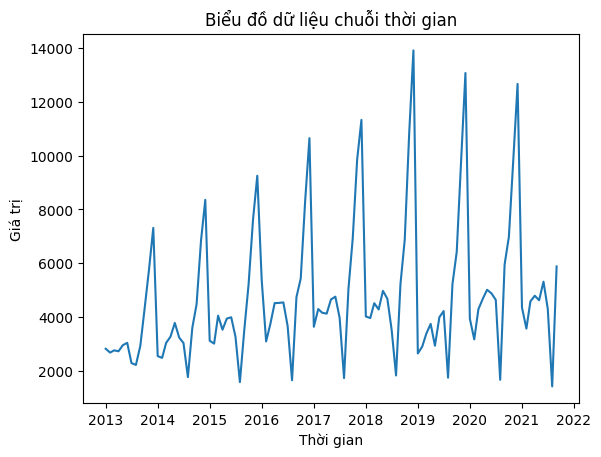

In [46]:
plt.plot(values['Month'],values['Data'])
plt.title('Biểu đồ dữ liệu chuỗi thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

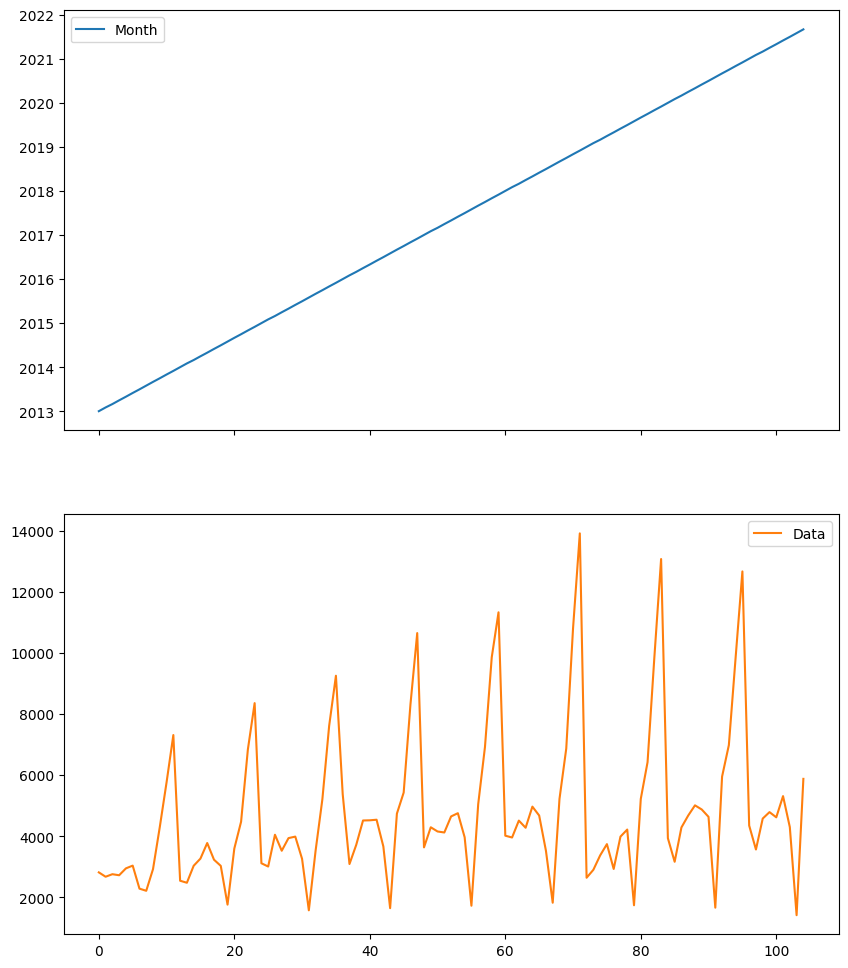

In [47]:
values.plot(subplots=True, figsize=(10, 12))

In [48]:
features.Data__sum_values[0]

499921.0